<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/LDA_ex_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Discriminant Analysis (LDA)
In our previous tutorial concerning PCA in Python with Scikit-Learn, we studied how we can reduce dimensionality of the feature set using PCA. In this article we will study another very important dimensionality reduction technique: linear discriminant analysis (or LDA). But first let's briefly discuss how PCA and LDA differ from each other.

Both PCA and LDA are linear transformation techniques. However, PCA is **unsupervised** while LDA is a **supervised** dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

Let us now see how we can implement LDA using Python's Scikit-Learn.

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


## Load Dataset

In [81]:
# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
#ris = load_iris()
data = pd.read_csv("winequality-red.csv",sep=';')
# food=food.loc[:,'fixed acidity':'alcohol']
#food.head()
# food.iloc[200]
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
#column=data.loc[:,'fixed acidity':'alcohol'].columns
#data = pd.DataFrame(data= food.loc[:,'fixed acidity':'alcohol'], food.loc[:,'quality'])
#                    columns= column + ['target'])

#data
target=[]
for i in data.index:
  if data['quality'].iloc[i]<=4:
    target.append(0)

  if  data['quality'].iloc[i] > 4 and data['quality'].iloc[i] < 6:
    target.append(1)

  if  data['quality'].iloc[i] >= 6:
    target.append(2)

data['target']=target

data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  target  
0         9.4        5       1  
1         9.8        5       1  
2         9.8        5       1  
3         9.8        6       2  
4         9.4        5       1  
...       ...      ...     ...  
1594     10.5        5       1  
1595     11.2        6       2  
1596     11.0        6       2  
1597     10.2        5       1  
1598     11.0        6       2  

[1599 rows x 13 columns]

<Axes: >

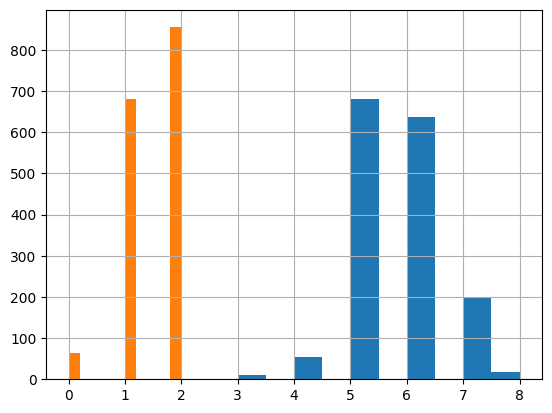

In [82]:
data['quality'].hist()
data['target'].hist()

# 1. Look at the data

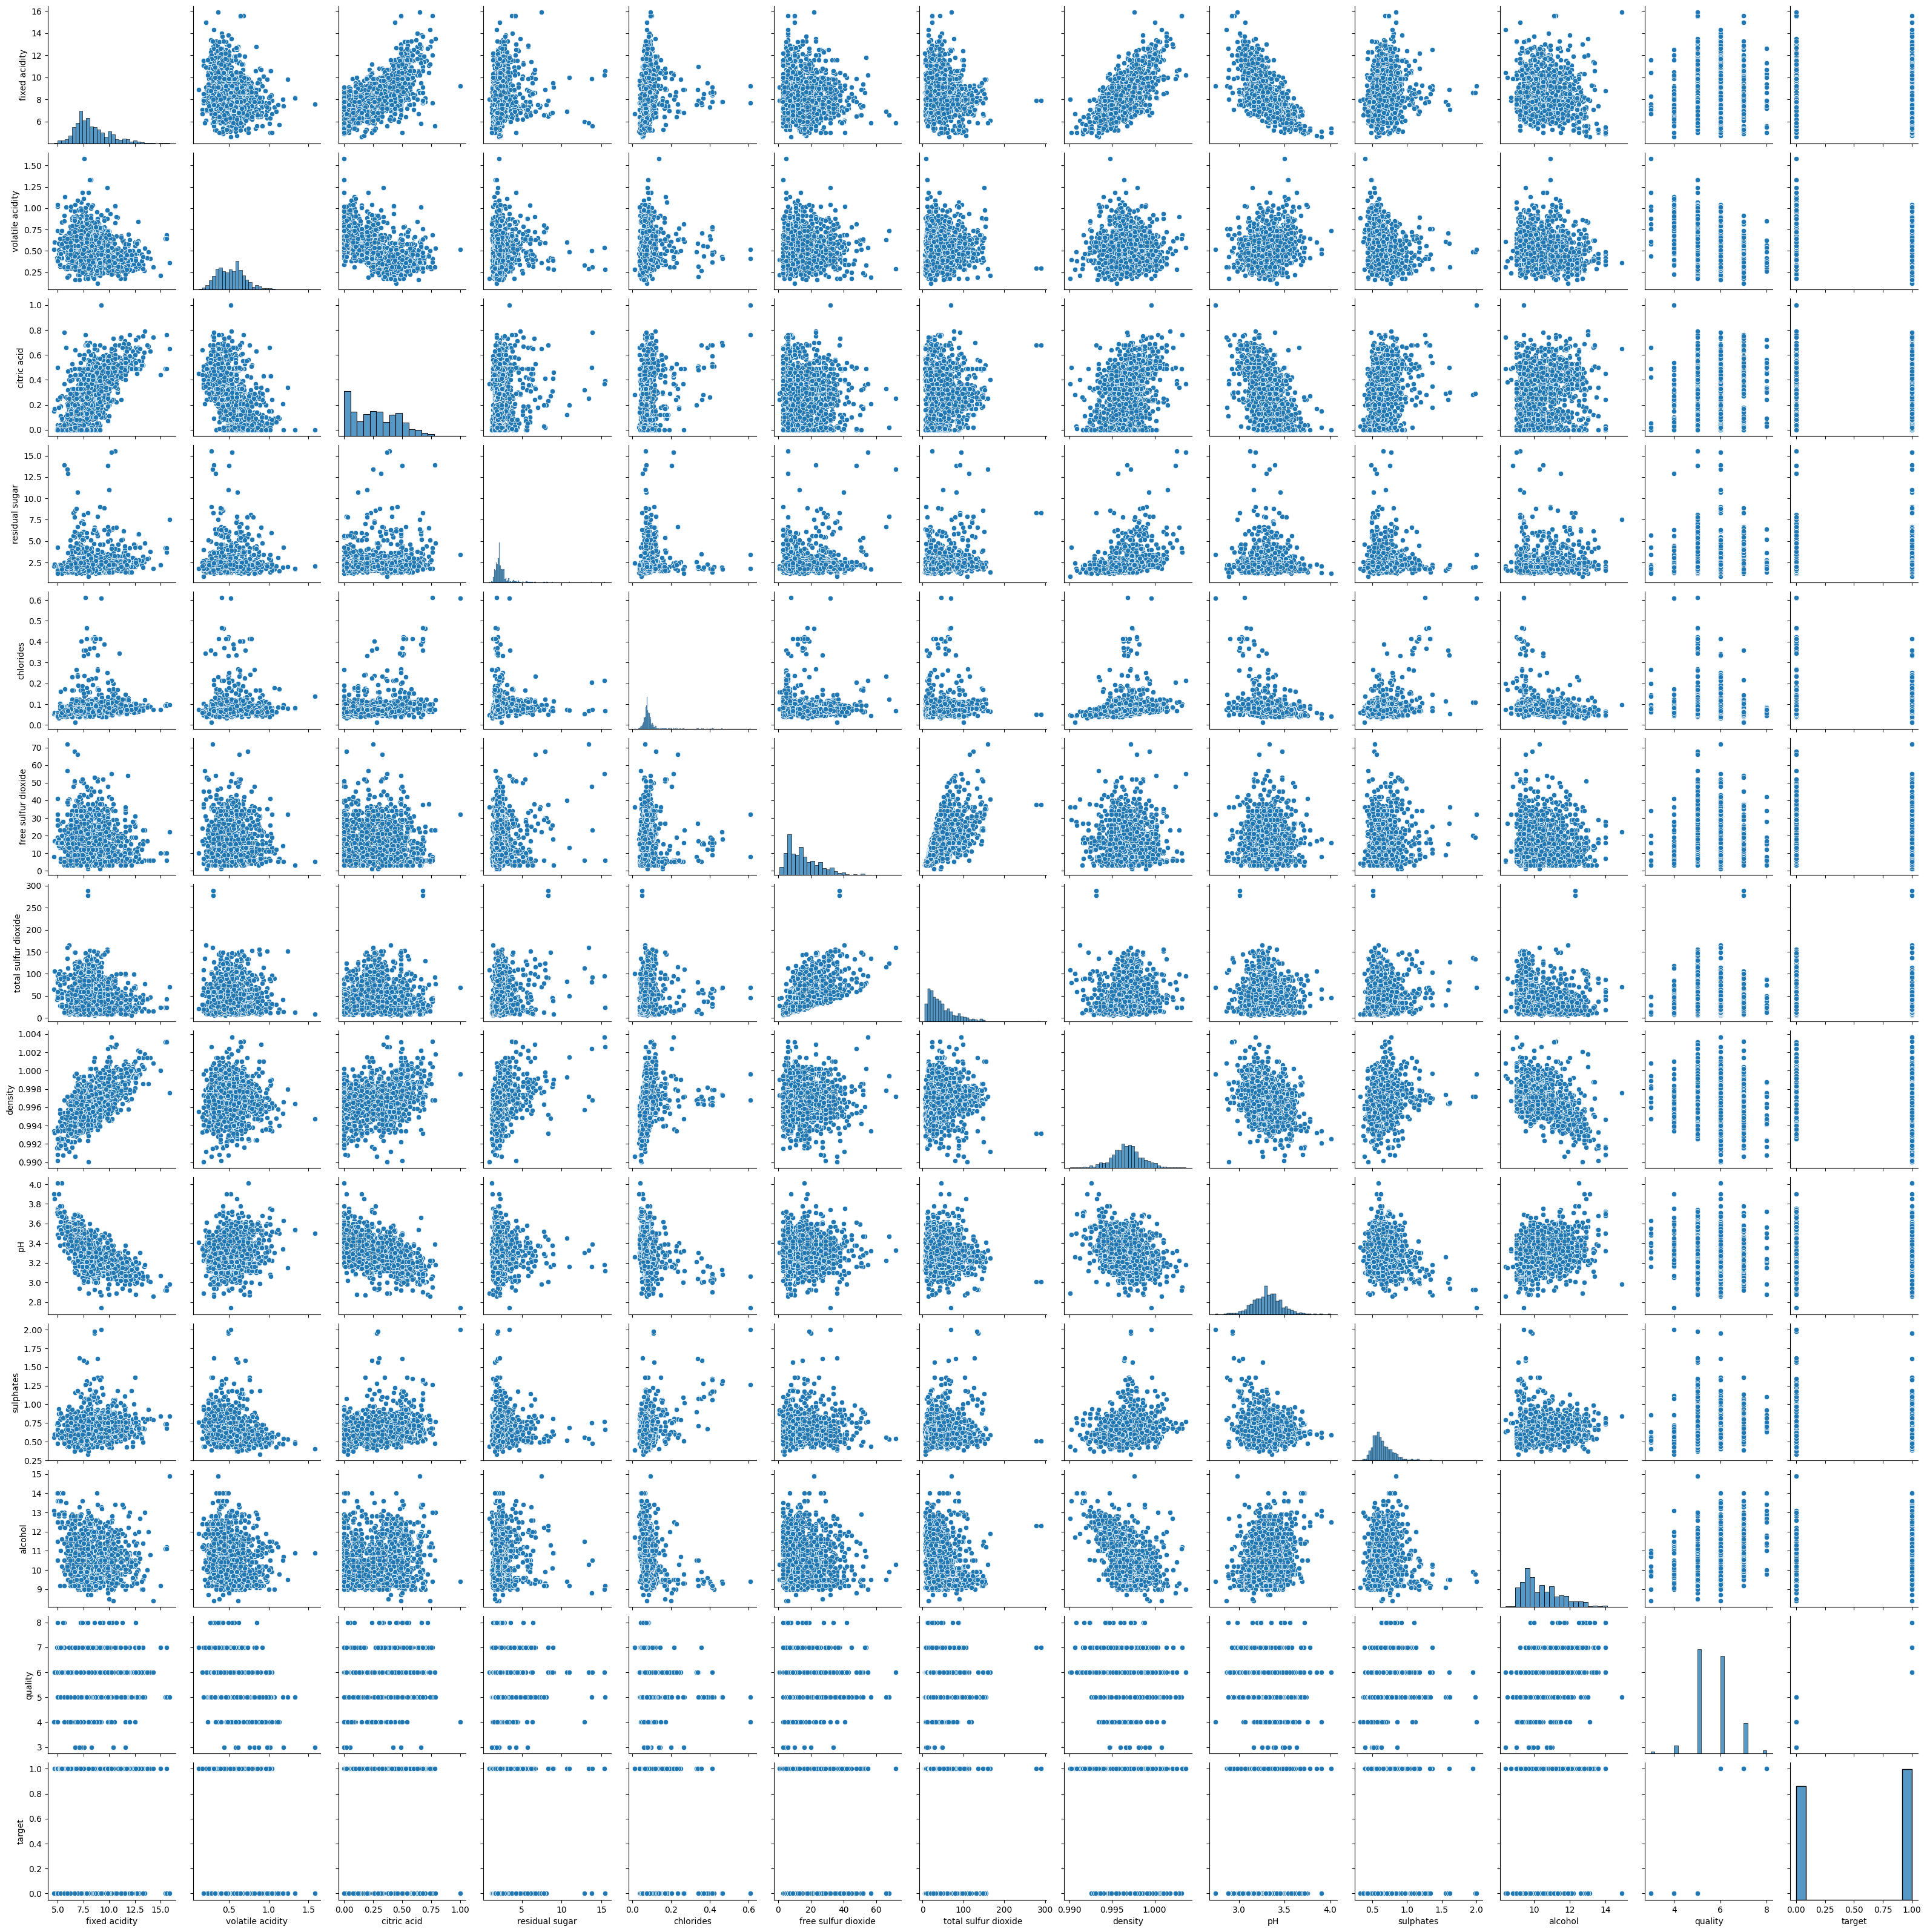

In [4]:
import seaborn as sns

sns.pairplot(data)

correlation plot?

<Axes: >

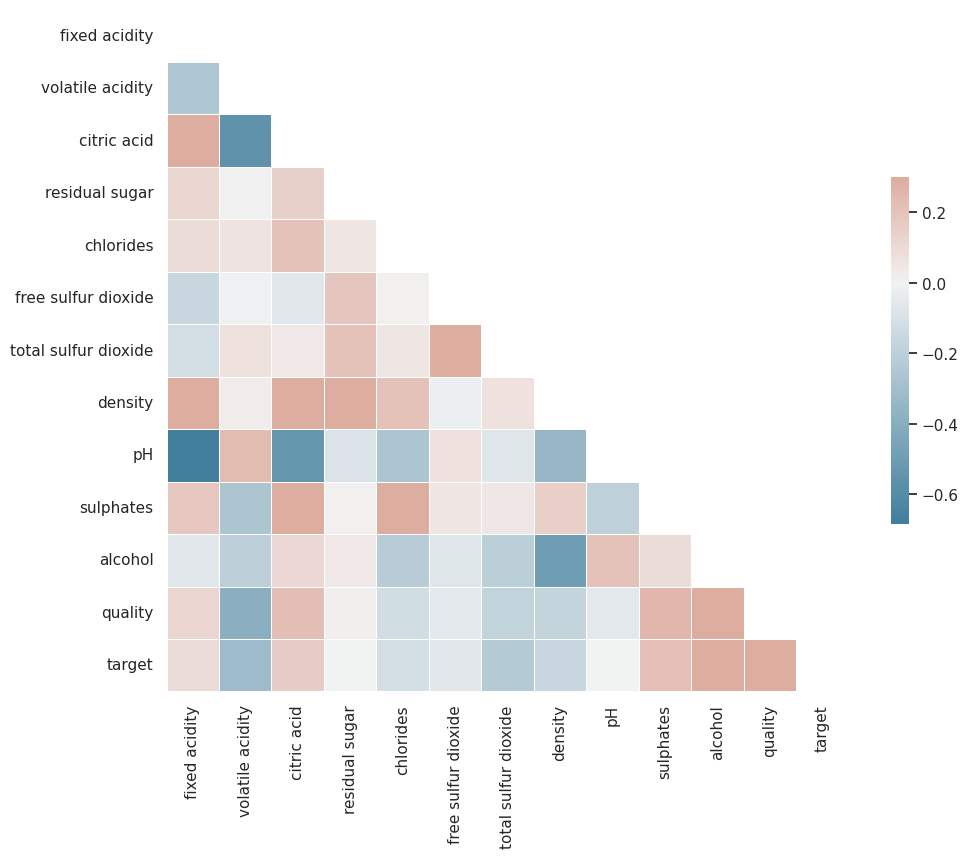

In [6]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

What do we see? Can we plot anything more?

## Step 2, perform a PCA

Follow the previous note book...

In [97]:
# scale the data
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality    target  
0 -0.960246 -0.787823 -0.863825  
1 -0.584777 -0.787823 -0.863825  
2 -0.584777 -0.787823 -0.863825  
3 -0.584777  0.450848  0.880185  
4 -0.960246 -0.787823 -0.863825

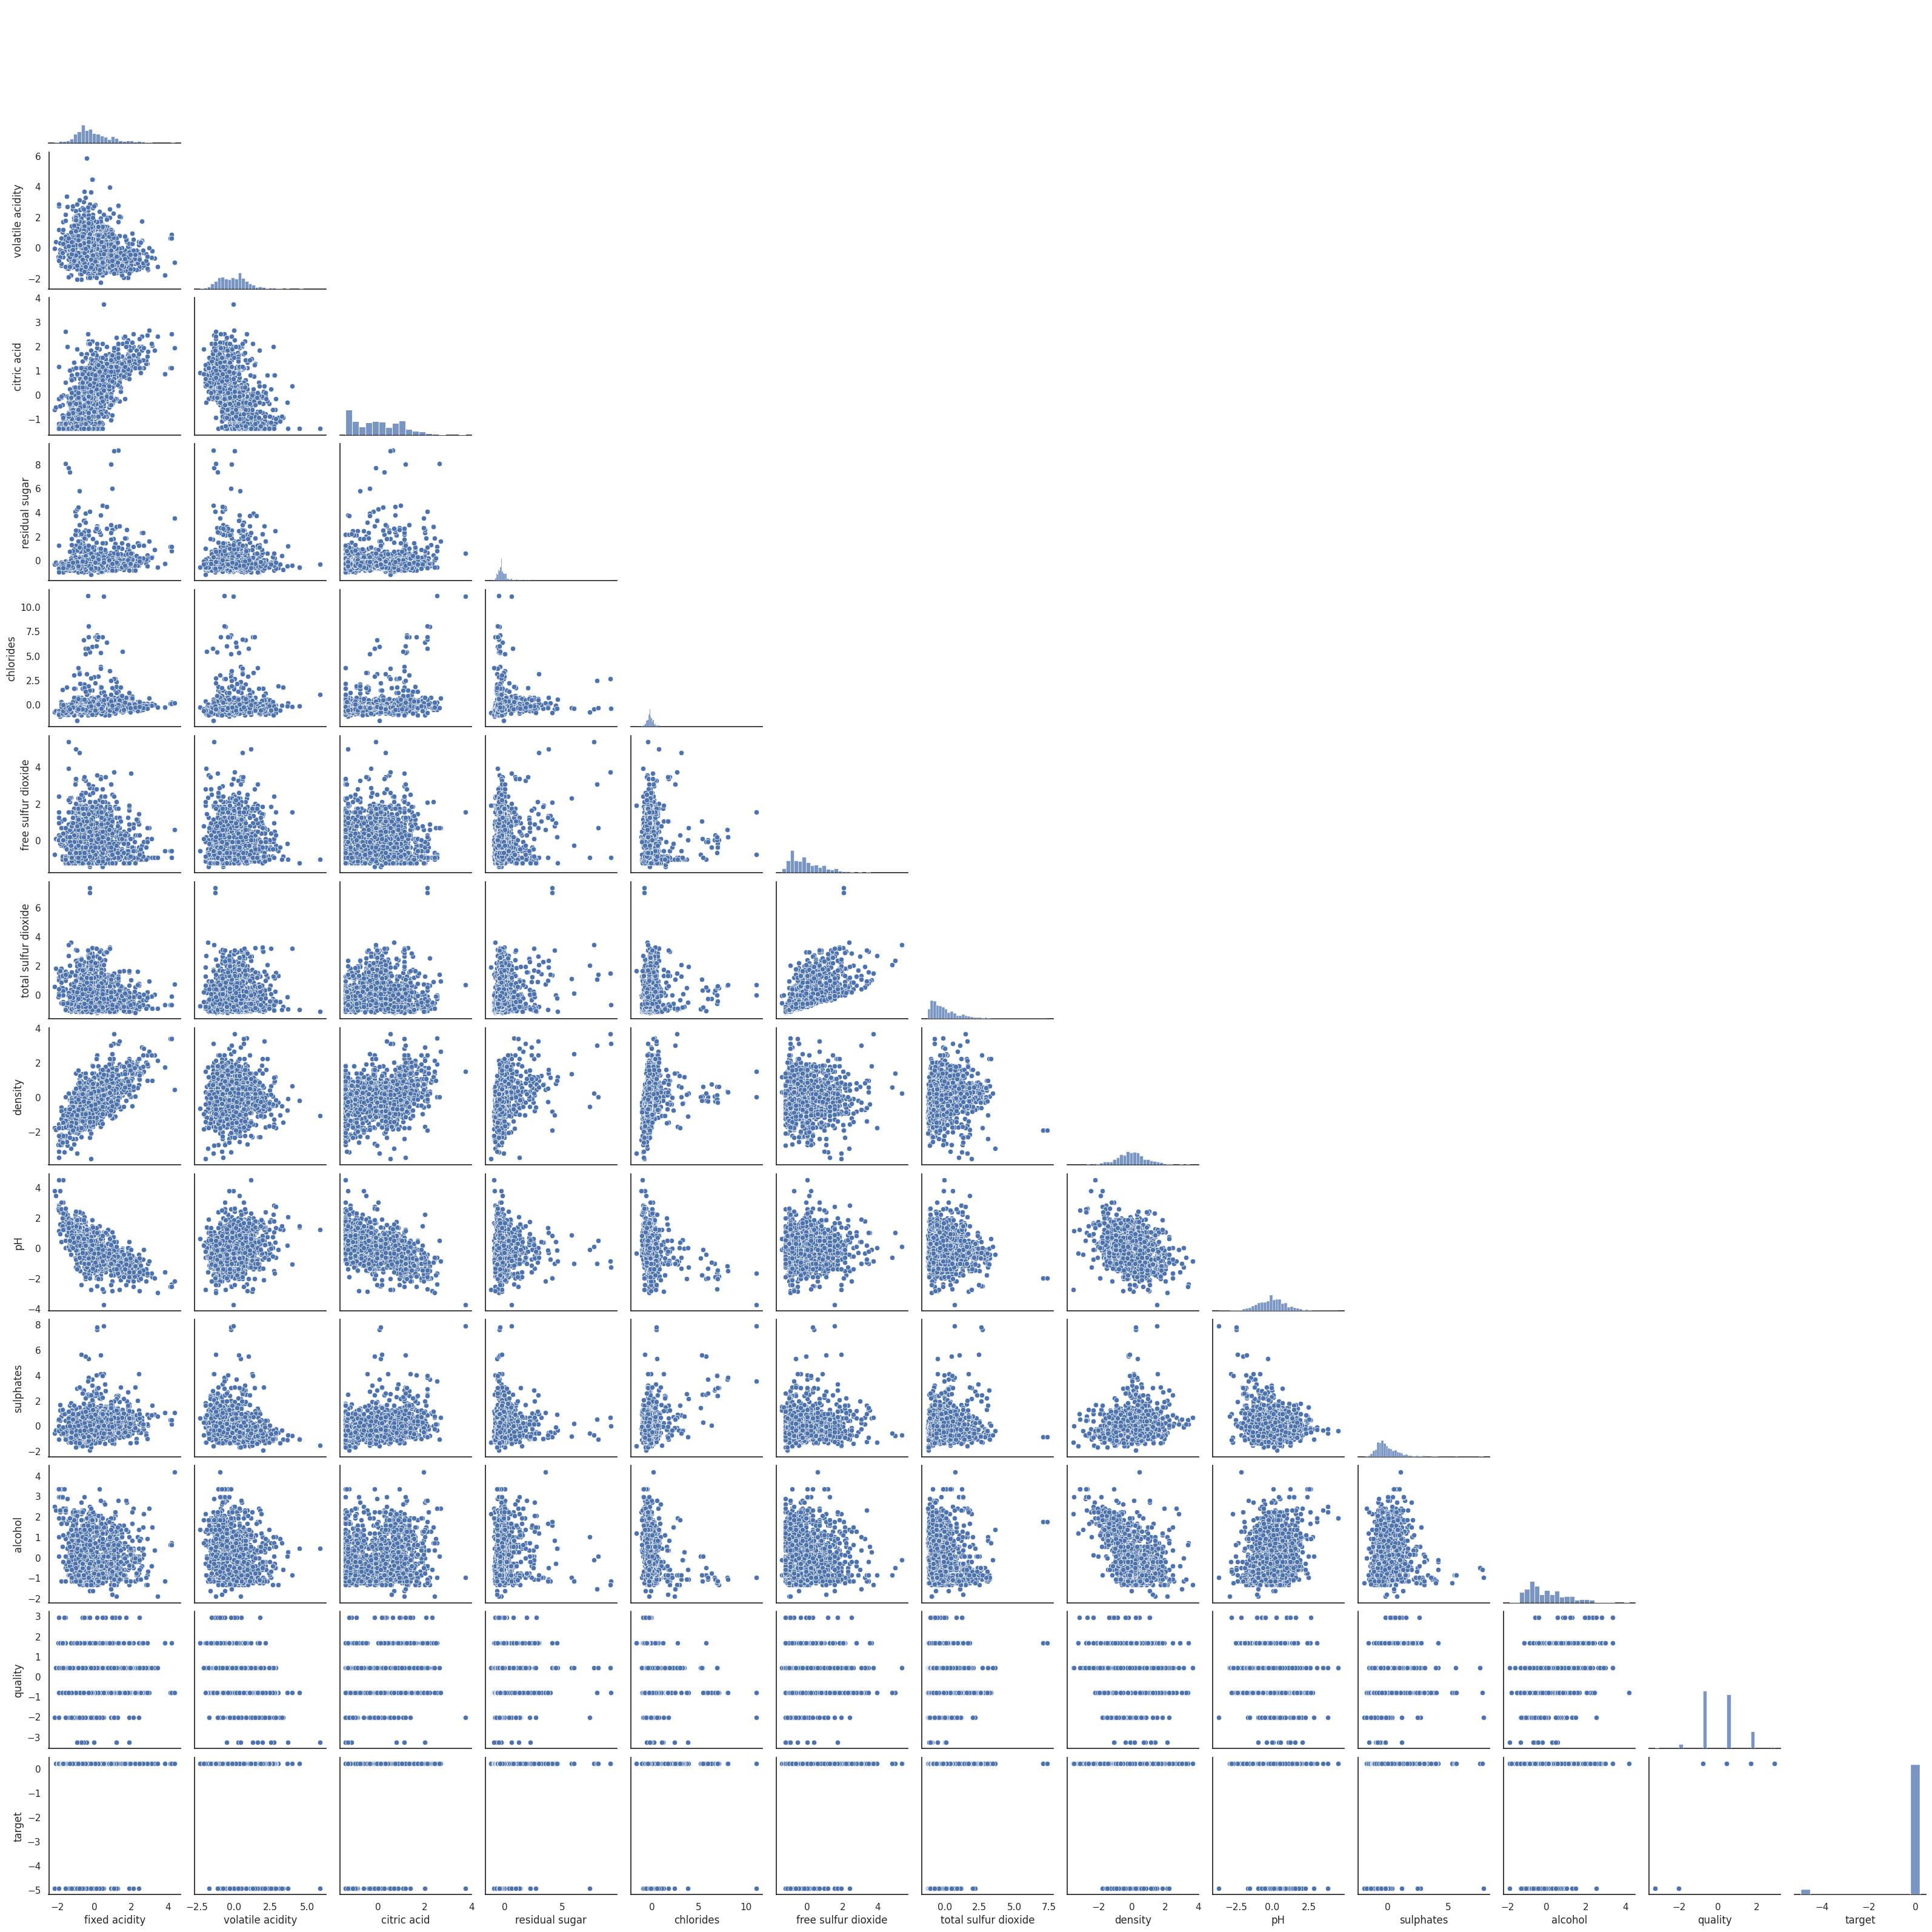

In [7]:
sns.pairplot(data_scaled, corner=True)

do the PCA

In [98]:
data_pca = PCA().fit(data_scaled)

## look at the result

In [99]:
data_pca_eigen = pd.DataFrame(
    data_pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5","PC6", "PC7", "PC8", "PC9", "PC10", 'PC11', 'PC12','PC13'],
    index=data_scaled.columns,
)

# Compute the loadings
data_pca_data=pd.DataFrame()
data_pca_data["PC"]=data_pca_eigen.columns
data_pca_data["Explained Variance"] = data_pca.explained_variance_
data_pca_data["Explained Variance Ratio"] = data_pca.explained_variance_ratio_
data_pca_data.set_index('PC')

# Compute the scores
data_pca_scores = pd.DataFrame(
    data_pca.transform(data_scaled),
    columns=["PC1", "PC2", "PC3", "PC4", "PC5","PC6", "PC7", "PC8", "PC9", "PC10", 'PC11', 'PC12','PC13'],
    index=data_scaled.index,
)

In [100]:
data_pca_data

PC  Explained Variance  Explained Variance Ratio
0    PC1            3.197619                  0.245817
1    PC2            2.727237                  0.209656
2    PC3            1.729425                  0.132949
3    PC4            1.216577                  0.093524
4    PC5            0.996822                  0.076631
5    PC6            0.821505                  0.063153
6    PC7            0.654816                  0.050339
7    PC8            0.570952                  0.043892
8    PC9            0.420295                  0.032310
9   PC10            0.332665                  0.025574
10  PC11            0.180331                  0.013863
11  PC12            0.100613                  0.007735
12  PC13            0.059279                  0.004557


We start with the Explained Variance and the Explained Variance Ratio.



<Axes: xlabel='PC'>

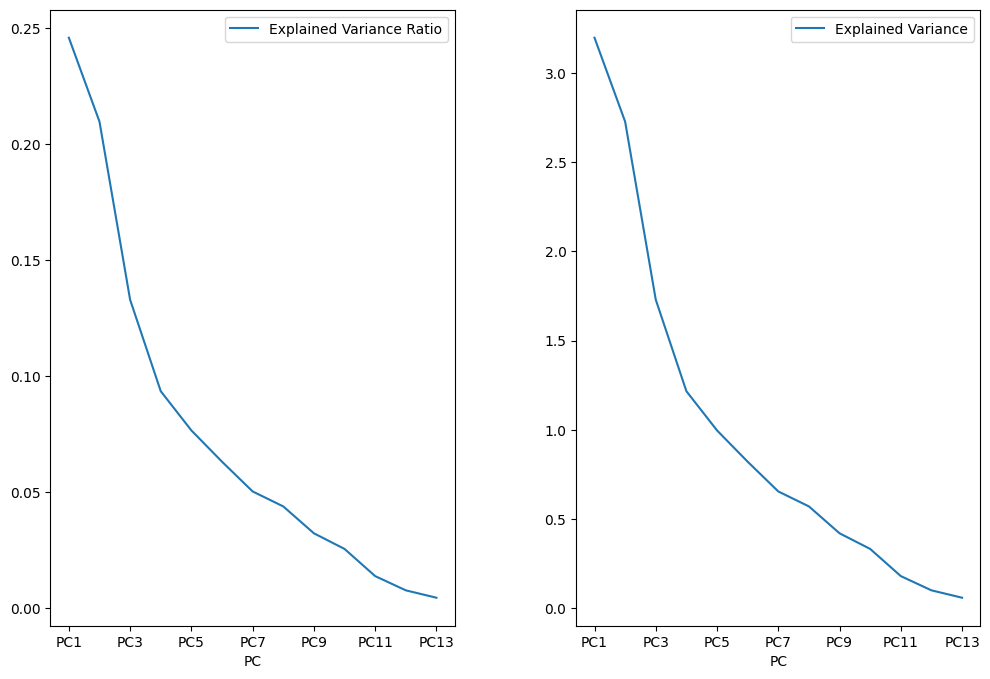

In [101]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

data_pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])

data_pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])


what do we see?

We note that PC1 and PC2 explaines together a sigificant portion of the variance. Using he criterion, we can remove PC3-PC5. Let us look in more detail on PC1 and PC2.

In [102]:
data_pca_eigen

PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.452758  0.173864 -0.171131 -0.231636 -0.067911   
volatile acidity     -0.328681  0.201480 -0.113031  0.020428  0.405114   
citric acid           0.470520  0.052028  0.033370 -0.042376 -0.219646   
residual sugar        0.108609  0.141353  0.279436 -0.387414  0.623919   
chlorides             0.141810  0.222220  0.014449  0.647030  0.280217   
free sulfur dioxide  -0.069472  0.112291  0.657504 -0.028582 -0.146043   
total sulfur dioxide -0.054533  0.234340  0.603106 -0.024501 -0.203621   
density               0.274834  0.390706 -0.076268 -0.216995  0.293338   
pH                   -0.387478 -0.206073  0.066224 -0.006795  0.232306   
sulphates             0.273677 -0.032785  0.168203  0.565390  0.178422   
alcohol               0.047808 -0.446377  0.083985 -0.071721  0.077833   
quality               0.257653 -0.454440  0.136730 -0.035375  0.182381   
target                0.237993 -0.433155  0.135054 -0.027979  0.203154   

                           PC6       PC7       PC8       PC9      PC10  \
fixed acidity        -0.075380  0.148705  0.325772 -0.184863 -0.189648   
volatile acidity     -0.229564  0.513655  0.432062 -0.076045  0.150468   
citric acid           0.300096 -0.007507 -0.010512 -0.324166  0.363807   
residual sugar        0.381969 -0.015304 -0.271735  0.295595 -0.034412   
chlorides             0.114891  0.252894 -0.395169 -0.387077 -0.044014   
free sulfur dioxide  -0.122713  0.021235  0.078227 -0.255671 -0.617524   
total sulfur dioxide -0.079244  0.147612  0.090860  0.061336  0.604302   
density              -0.237670 -0.332465  0.172108 -0.244199  0.018601   
pH                    0.088784 -0.539148  0.131032 -0.528653  0.191042   
sulphates             0.054881 -0.335356  0.494691  0.409385 -0.024748   
alcohol               0.534904  0.317687  0.379417 -0.189329 -0.079262   
quality              -0.333150  0.094846 -0.077509 -0.010621  0.100427   
target               -0.454565  0.062930 -0.145723 -0.077222  0.074682   

                          PC11      PC12      PC13  
fixed acidity        -0.256439  0.050704  0.636265  
volatile acidity      0.377157 -0.011593  0.006328  
citric acid           0.624344 -0.054038 -0.066044  
residual sugar        0.088092 -0.014957  0.185083  
chlorides            -0.208642  0.043269  0.051432  
free sulfur dioxide   0.237933  0.016617 -0.053725  
total sulfur dioxide -0.355059  0.003925  0.070447  
density              -0.231474  0.002759 -0.568028  
pH                   -0.005618  0.050908  0.338629  
sulphates             0.097668 -0.037575  0.069851  
alcohol              -0.319910 -0.079922 -0.313599  
quality               0.052170  0.729842 -0.048039  
target                0.000225 -0.670014  0.056190

<Axes: >

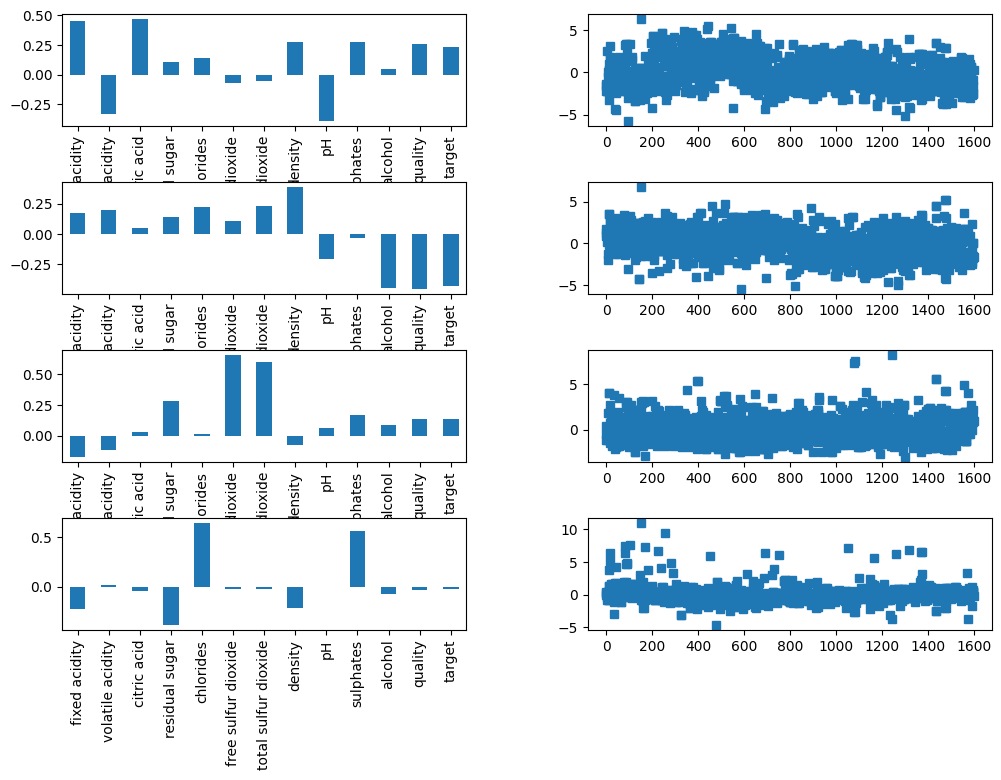

In [103]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()
data_pca_eigen['PC1'].plot.bar(ax=axs[0])
data_pca_scores['PC1'].plot(ax=axs[1], marker='s', linestyle='None')

data_pca_eigen['PC2'].plot.bar(ax=axs[2])
data_pca_scores['PC2'].plot(ax=axs[3], marker='s', linestyle='None')

data_pca_eigen['PC3'].plot.bar(ax=axs[4])
data_pca_scores['PC3'].plot(ax=axs[5], marker='s', linestyle='None')

data_pca_eigen['PC4'].plot.bar(ax=axs[6])
data_pca_scores['PC4'].plot(ax=axs[7], marker='s', linestyle='None')


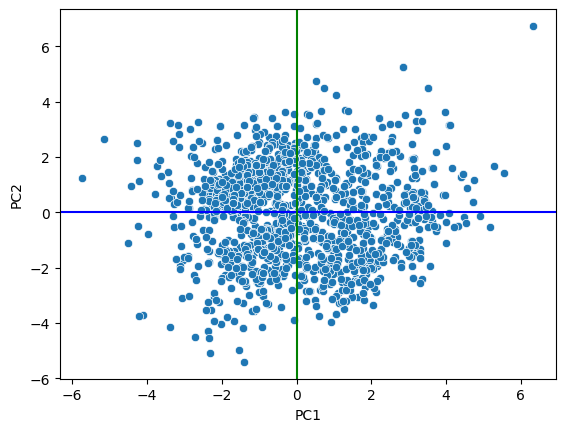

In [104]:
# Plot the scores
sns.scatterplot(data=data_pca_scores, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

looks like we have a division in to at least two groups...

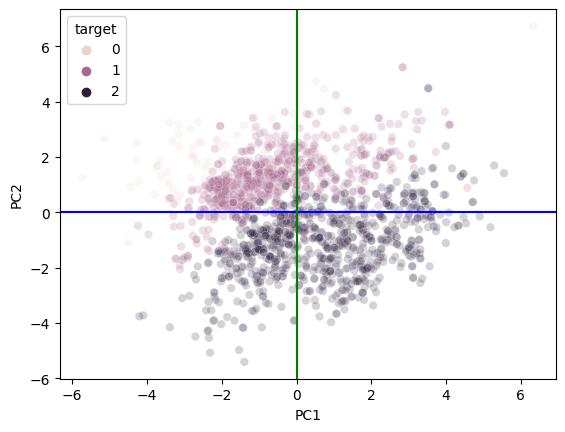

In [105]:
# Plot the scores
sns.scatterplot(data=data_pca_scores, x="PC1", y="PC2", hue=data['target'], alpha=0.2)
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

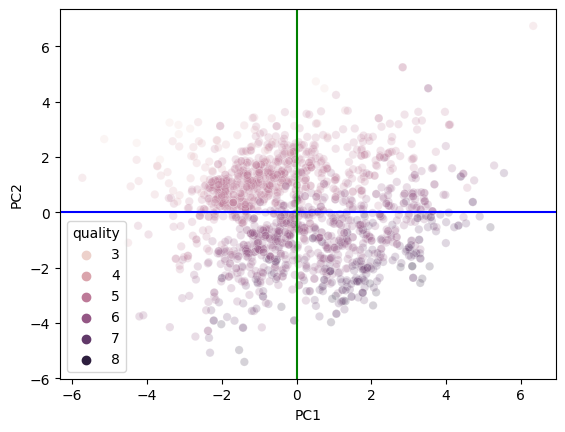

In [106]:
# Plot the scores
sns.scatterplot(data=data_pca_scores, x="PC1", y="PC2", hue=data['quality'], alpha=0.2)
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

by separating the values into the targets, we see that it is actually three.

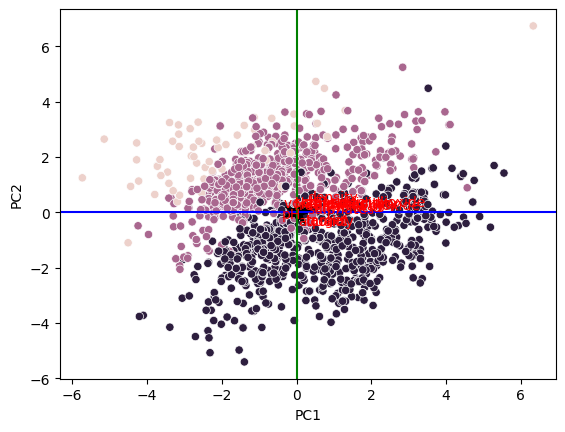

In [107]:
# Correlation Biplot
sns.scatterplot(
    data=data_pca_scores,
    x="PC1",
    y="PC2",
    hue=data['target'],
    legend=False,
)
plt.axhline(0, color="blue")
plt.axvline(0, color="green")

# plot the variables as vectors
plt.quiver(
    np.zeros(data_pca_eigen.shape[0]),
    np.zeros(data_pca_eigen.shape[0]),
    data_pca_eigen["PC1"],
    data_pca_eigen["PC2"],
    angles="xy",
    scale_units="xy",
    scale=1,
)

# Plot annotations
for i in range(data_pca_eigen.shape[0]):
    plt.text(
        data_pca_eigen["PC1"][i],
        data_pca_eigen["PC2"][i],
        data_pca_eigen.index[i],
        color="red",
    )




The plot shows the observations as points in the plane formed by two principal components (synthetic variables). Like for any scatterplot we may look for patterns, clusters, and outliers.

In addition to the observations the plot shows the original variables as vectors (arrows). They begin at the origin [0,0] and extend to coordinates given by the loading vector (see loading plot above). These vectors can be interpreted in three ways:

- The orientation (direction) of the vector, with respect to the principal component space, in particular, its angle with the principal component axes: the more parallel to a principal component axis is a vector, the more it contributes only to that PC.
- The length in the space; the longer the vector, the more variability of this variable is represented by the two displayed principal components; short vectors are thus better represented in other dimension.
- The angles between vectors of different variables show their correlation in this space: small angles represent high positive correlation, right angles represent lack of correlation, opposite angles represent high negative correlation.

# Ok let's perform a LDA
LDA is supervised


In [83]:
data_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol   quality    target  
0     -0.579207 -0.960246 -0.787823 -1.072004  
1      0.128950 -0.584777 -0.787823 -1.072004  
2     -0.048089 -0.584777 -0.787823 -1.072004  
3     -0.461180 -0.584777  0.450848  0.932832  
4     -0.579207 -0.960246 -0.787823 -1.072004  
...         ...       ...       ...       ...  
1594  -0.461180  0.072294 -0.787823 -1.072004  
1595   0.601055  0.729364  0.450848  0.932832  
1596   0.542042  0.541630  0.450848  0.932832  
1597   0.305990 -0.209308 -0.787823 -1.072004  
1598   0.010924  0.541630  0.450848  0.932832  

[1599 rows x 13 columns]

In [84]:
X=data.loc[:,'fixed acidity':'alcohol']  # funkar iloc?
y=data.loc[:,'target']

In [85]:
n_samples, n_features = X.shape
classes = np.unique(y)
n_classes = len(classes)
n_components = 2
max_components = min(n_classes-1,n_features)
print("Number of classes: {}".format(n_classes))
print("Number of features: {}".format(n_features))
if n_components > max_components:
   raise ValueError("the number of components cannot be larger than min(n_features,n_classes-1)")

Number of classes: 3
Number of features: 11


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
n_samples, n_features = X_train.shape
classes = np.unique(y_train)
n_classes = len(classes)
n_components = 2
max_components = min(n_classes-1,n_features)
print("Number of classes: {}".format(n_classes))
print("Number of features: {}".format(n_features))
if n_components > max_components:
   raise ValueError("the number of components cannot be larger than min(n_features,n_classes-1)")

Number of classes: 3
Number of features: 11


now, let's perform the actual LDA

In [90]:
lda = LDA(n_components=2)
X_lda = lda.fit(X_train, y_train)
#X_lda_test = lda.transform(X_test)

In the script above, we have used the LinearDiscriminantAnalysis class imported earlier as LDA. We have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminants that we want to retrieve. In this case we set the n_components to 1 (as the PCA showed that this was enough) and we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.


Notice, in the case of LDA, the transform method takes **two parameters**: the X_train and the y_train. However in the case of PCA, the transform method only requires **one parameter** i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.


In [91]:
X_lda.get_params()

{'covariance_estimator': None,
 'n_components': 2,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

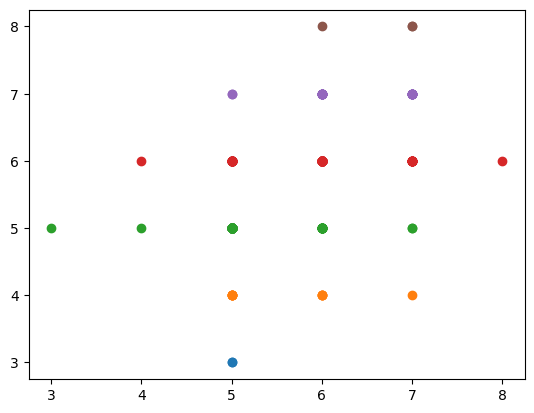

In [37]:
plt.scatter(X_lda.predict(X_test[y_test==3]), y_test[y_test==3])
plt.scatter(X_lda.predict(X_test[y_test==4]), y_test[y_test==4])
plt.scatter(X_lda.predict(X_test[y_test==5]), y_test[y_test==5])
plt.scatter(X_lda.predict(X_test[y_test==6]), y_test[y_test==6])
plt.scatter(X_lda.predict(X_test[y_test==7]), y_test[y_test==7])
plt.scatter(X_lda.predict(X_test[y_test==8]), y_test[y_test==8])



In [92]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, X_lda.predict(X_test)))

Accuracy: 0.734375


In [109]:
#plt.scatter(X_lda.predict(X_test[y_test==0]),y_test[y_test==0])
#plt.bar(X_lda.coef_)
COEFF=pd.DataFrame()
COEFF['class1']=np.abs(X_lda.coef_[0,:])
COEFF['class2']=np.abs(X_lda.coef_[1,:])
COEFF['class3']=np.abs(X_lda.coef_[2,:])
#COEFF['class4']=np.abs(X_lda.coef_[3,:])
#COEFF['class5']=np.abs(X_lda.coef_[4,:])
#COEFF['class6']=np.abs(X_lda.coef_[5,:])

COEFF['LDA1']=np.abs(X_lda.scalings_[:,0])
COEFF['LDA2']=np.abs(X_lda.scalings_[:,1])

COEFF.index=X.columns

COEFF

class1    class2    class3      LDA1      LDA2
fixed acidity         0.926413  0.237834  0.122309  0.208036  0.775399
volatile acidity      1.574670  0.186280  0.264191  0.435737  0.943104
citric acid           0.547996  0.074535  0.099701  0.164616  0.322044
residual sugar        0.431951  0.101531  0.049544  0.084485  0.355596
chlorides             0.319657  0.100814  0.103993  0.172663  0.151457
free sulfur dioxide   0.045495  0.118456  0.091365  0.152940  0.105862
total sulfur dioxide  0.511849  0.375380  0.262614  0.441051  0.583291
density               1.106851  0.167742  0.053067  0.092948  0.852522
pH                    0.940064  0.063139  0.018345  0.027091  0.673701
sulphates             0.056161  0.301314  0.244986  0.409412  0.153423
alcohol               0.795065  0.448162  0.416471  0.693327  0.251390

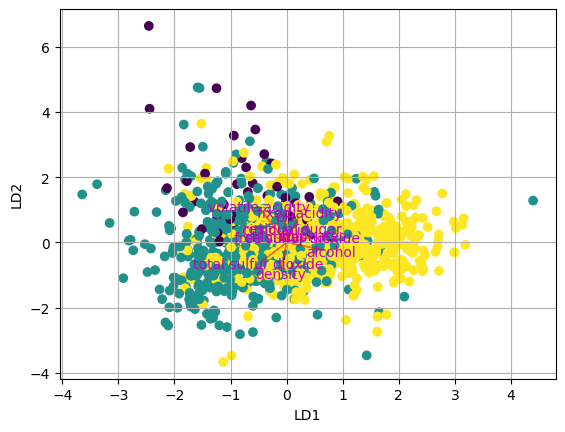

In [117]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_train) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'm', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'm', ha = 'center', va = 'center')

plt.xlabel("LD{}".format(1))
plt.ylabel("LD{}".format(2))
plt.grid()
x_new=X_lda.transform(X_train)
#Call the function.
myplot(x_new[:,0:2], X_lda.scalings_,labels=X.columns)
plt.show()

<Axes: >

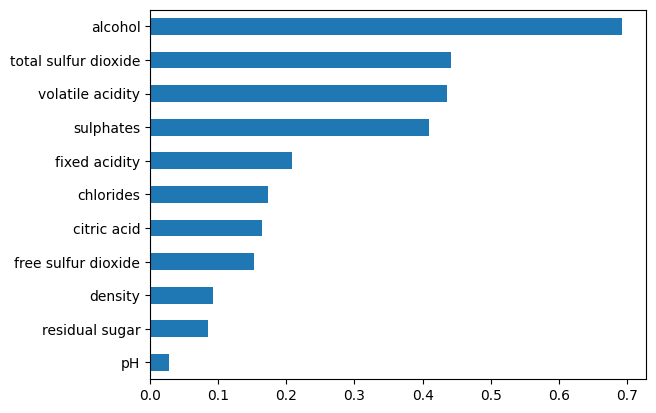

In [114]:
 #plt.barh(range(top), imp[::-1][0:top], align='center')
 #   plt.yticks(range(top), names[::-1][0:top])
 #   plt.show()

 COEFF['LDA1'].sort_values().plot.barh()

In [171]:
X_lda.explained_variance_ratio_

array([0.82863687, 0.12032383])

Ok, we know a bit more about this data set...

In [28]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [172]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors


C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


for model, titles in zip(models, titles):
   # Model Accuracy: how often is the classifier correct?
   y_pred=model.predict(X_test)
   print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.6
Accuracy: 0.634375
Accuracy: 0.690625
Accuracy: 0.65


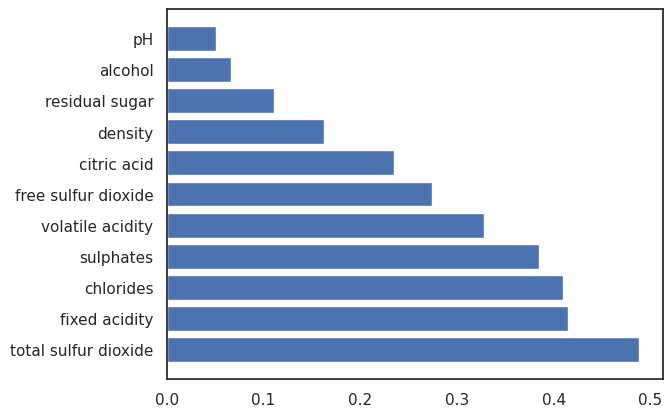

In [191]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
feature_names=X.columns
svm = svm.SVC(kernel='linear')
clf=svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function
# if you are interested in negative contribution of features
f_importances(abs(clf.coef_[0]), feature_names, top=11)

<Axes: >

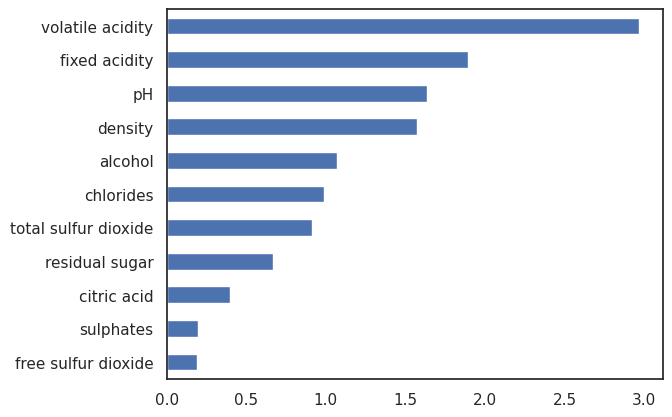

In [197]:

 COEFF['LDA1'].sort_values().plot.barh()